In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./data/202107-citibike-tripdata.csv", low_memory=False)

## Warm Up Questions

In [3]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member


## Question 1:

In [4]:
#covert type from string to datetime
data["started_at"]=pd.to_datetime(data["started_at"])
data["ended_at"]=pd.to_datetime(data["ended_at"])

In [5]:
data["started_at"][0]

Timestamp('2021-07-09 16:05:36')

In [6]:
data["ended_at"][0]

Timestamp('2021-07-09 16:18:09')

In [7]:
data["duration"]=data["ended_at"]-data["started_at"]

In [8]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04


In [9]:
min(data["duration"])

Timedelta('-1 days +23:49:50')

In [10]:
max(data["duration"])

Timedelta('33 days 22:32:47')

In [20]:
#calculate trip duration in minutes
data["time_mins"] = data['duration'].dt.total_seconds().div(60).astype(float)

In [12]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32,5.533333
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29,20.483333
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07,7.116667
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667


In [13]:
max(data["time_mins"])

48872.78333333333

In [14]:
data["time_mins"].count()

3084537

In [15]:
time_mins = data["time_mins"]

In [16]:
x = np.linspace(0,140,20)

In [17]:
x

array([  0.        ,   7.36842105,  14.73684211,  22.10526316,
        29.47368421,  36.84210526,  44.21052632,  51.57894737,
        58.94736842,  66.31578947,  73.68421053,  81.05263158,
        88.42105263,  95.78947368, 103.15789474, 110.52631579,
       117.89473684, 125.26315789, 132.63157895, 140.        ])

Text(0, 0.5, 'Frequency')

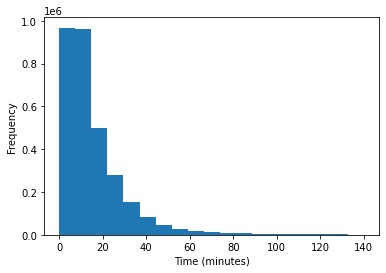

In [21]:
plt.hist(time_mins, x)
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")

In [27]:
len(data[(data["time_mins"]<150) & (data["time_mins"]>0)])/len(data)


0.9953626751762096

99.54% of the data falls between a trip duration of 0 to 150 minutes. 
The negative data points and any points longer than 150 minutes were removed as outliers

In [28]:
data_clean = data[data["time_mins"]>0]
data_clean = data_clean[data_clean["time_mins"]<150]

In [31]:
#average ride duration:
sum(data_clean["time_mins"])/len(data_clean)

15.504624247301857

In [32]:
#empiracle variance
np.var(data_clean["time_mins"])

222.92425506435038

In [33]:
#probability that a ride duration is greater than 20 mins
len(data_clean[data_clean["time_mins"]>20])/len(data_clean)

0.24646859049459763